In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

# Build the full file path
file_path = os.path.join(path, "creditcard.csv")

# Load dataset into pandas
df = pd.read_csv(file_path)
print(df.head())

Path to dataset files: /kaggle/input/creditcardfraud
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.

In [2]:
#Setting up the X and y values
X = df.drop("Class", axis=1)
y = df["Class"]

In [3]:
print(X.head(), y.head())
print(X.shape, y.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score

#Spliting the Data into Testing and Training Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Setting up the Parameters
param = {

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.4,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 37,
    'scale_pos_weight': 577

}

#Printing a snipit of the X_train and y_train
print(X_train.head(), y_train.head())

#Selecting the Classification model of XGBoost
model = xgb.XGBClassifier(**param)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred) * 100, '%')

            Time        V1        V2        V3        V4        V5        V6  \
223361  143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
165061  117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
238186  149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
150562   93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
138452   82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   

              V7        V8        V9  ...       V20       V21       V22  \
223361 -0.627978  0.035994  1.054560  ... -0.125390  0.238197  0.968305   
165061  0.017959 -0.401619  0.040378  ... -0.470372 -0.153485  0.421703   
238186  0.787858  0.117276 -0.131275  ...  0.012227 -0.314638 -0.872959   
150562  0.847902 -0.081323  0.371579  ... -0.253757  0.063525  0.443431   
138452 -0.435632  1.313760  0.536044  ... -0.012320 -0.480691 -0.230369   

             V23       V24       V25       V26       V27       V28  

In [5]:
# Filter down to fraud-only transactions
NewX_test = X_test.copy()
NewX_test["Class"] = y_test
fraud_only = NewX_test[NewX_test["Class"] == 1]

X_fraud = fraud_only.drop("Class", axis=1)
y_fraud = fraud_only["Class"]

print(X_fraud.head(), y_fraud.head())

# Predictions on fraud-only subset
y_pred_fraud = model.predict(X_fraud)

#Finding the accuracy given that all test case presented was fraudulent
print("Fraud-only detection rate:", metrics.accuracy_score(y_fraud, y_pred_fraud) * 100, "%")

from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))  # same as fraud-only accuracy
print("F1 Score:", f1_score(y_test, y_pred))


            Time         V1        V2         V3        V4         V5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
116404   74262.0  -2.250535  2.365755  -2.955491  0.089791  -2.830745   
215984  140308.0  -4.861747 -2.722660  -4.656248  2.502005  -2.008346   
249239  154309.0  -0.082983 -3.935919  -2.616709  0.163310  -1.400952   
146790   87883.0  -1.360293 -0.458069  -0.700404  2.737229  -1.005106   

              V6         V7        V8        V9  ...       V20       V21  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ... -1.514923  1.190739   
116404 -0.844462  -0.174062 -0.407138  0.174216  ... -0.486537  0.256560   
215984  0.615422  -3.485680  1.878856 -1.116268  ...  0.285559  1.138876   
249239 -0.809419   1.501580 -0.471000  1.519743  ...  1.878612  0.702672   
146790  2.891399   5.802537 -1.933197 -1.017717  ... -1.493401 -0.936990   

             V22       V23       V24       V25       V26       V27       V28  \
43428  -1.127670 -2.3585

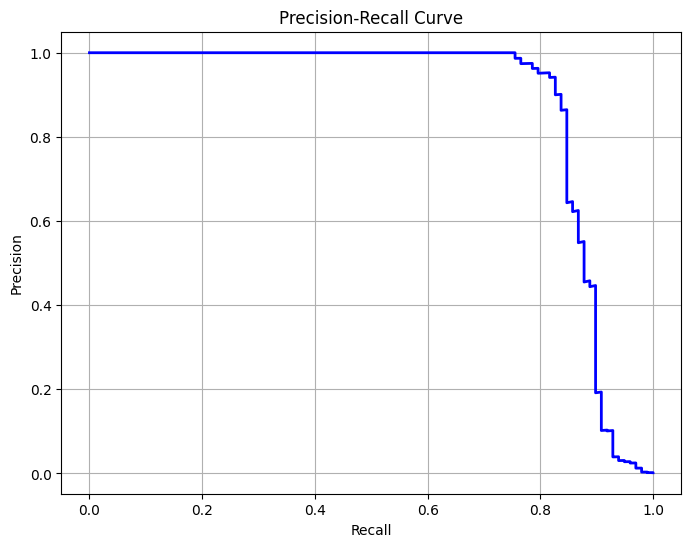

In [6]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

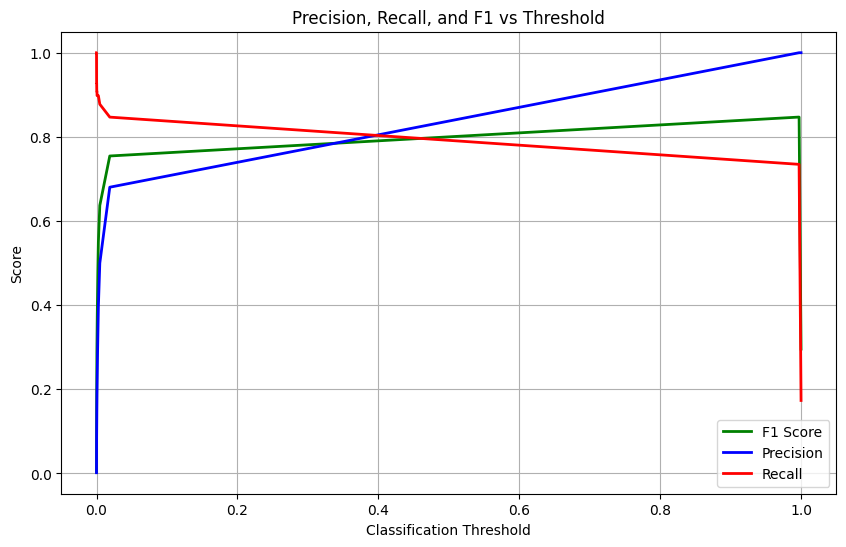

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, make_scorer

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_true = y_test.values

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)

# Sample thresholds to speed up plotting (every 50th point)
thresholds_sampled = thresholds[::50]

# Compute F1 for sampled thresholds
f1_scores = []
for t in thresholds_sampled:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    tp = np.sum((y_pred_thresh == 1) & (y_true == 1))
    fp = np.sum((y_pred_thresh == 1) & (y_true == 0))
    fn = np.sum((y_pred_thresh == 0) & (y_true == 1))
    f1 = 2 * tp / (2 * tp + fp + fn) if (2*tp + fp + fn) != 0 else 0
    f1_scores.append(f1)

# Plot Precision, Recall, and F1 vs Threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds_sampled, f1_scores, label="F1 Score", color="green", lw=2)
plt.plot(thresholds_sampled, [precision[np.searchsorted(thresholds, t)] for t in thresholds_sampled],
         label="Precision", color="blue", lw=2)
plt.plot(thresholds_sampled, [recall[np.searchsorted(thresholds, t)] for t in thresholds_sampled],
         label="Recall", color="red", lw=2)

plt.xlabel("Classification Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 5-fold stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)
scores = cross_val_score(model, X, y, cv=skf, scoring=f1_scorer)
print("F1 scores for each fold:", scores)
print("Average F1 score:", scores.mean())

F1 scores for each fold: [0.83248731 0.91891892 0.89010989 0.84782609 0.84375   ]
Average F1 score: 0.8666184411260002
